In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

from sklearn.metrics import confusion_matrix

# Part1: MNIST Handwritten Digits

## SVM

## Scaling MNIST Data


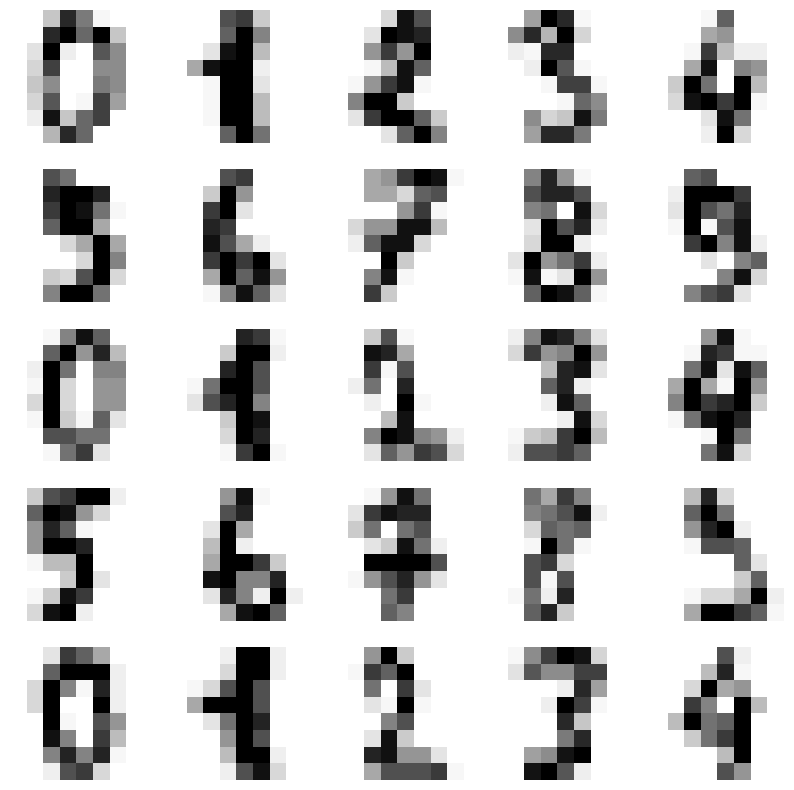

In [5]:
# load the data and scale it
digits = load_digits()
scaled_data = scale( digits.data )

plt.figure( figsize=(10, 10) )
 
for i in np.arange( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.imshow( digits.images[i] , cmap='Greys', interpolation='nearest' )
    plt.axis( 'off' )

plt.show()

## Use SVM with an rbf kernel and parameter C=100 to build a classifier using the training dataset.

## Using the test dataset, evaluate the accuracy of the model. Again using the test dataset, compute the confusion matrix. What is the most common mistake that the classifier makes?

In [6]:
# Split the data into training set and testing set
x = scale( digits.data )
y = digits.target
x_train, x_test, y_train, y_test = train_test_split( x, y, random_state=1, test_size=0.6 )

svc = svm.SVC( kernel='rbf', C=100 )
svc.fit(x_train , y_train )

y_test_pred = svc.predict(x_test)

accuracy = svc.score(x_test, y_test)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_test_pred))


Accuracy: 0.9814643188137164
[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 112   0   0   1   0   0   0   0   0]
 [  0   0 102   0   2   0   0   1   0   0]
 [  0   0   1 114   1   0   0   1   0   0]
 [  0   0   0   0 122   0   0   0   0   0]
 [  0   0   0   0   0  96   1   0   0   1]
 [  0   0   0   0   0   0 108   0   1   0]
 [  0   0   0   0   0   0   0 102   0   1]
 [  0   0   0   1   1   0   0   0  95   1]
 [  0   0   0   0   1   2   1   0   2 109]]


The highest non diagnol number is 2, occurring at the following positions:

Actual class 2 predicted as class 4.

Actual class 9 predicted as class 5.

Actual class 9 predicted as class 8.

Indicating number '9' is the most common mistake the classifier has when classification.

## Plot all of these misclassified digits as images.

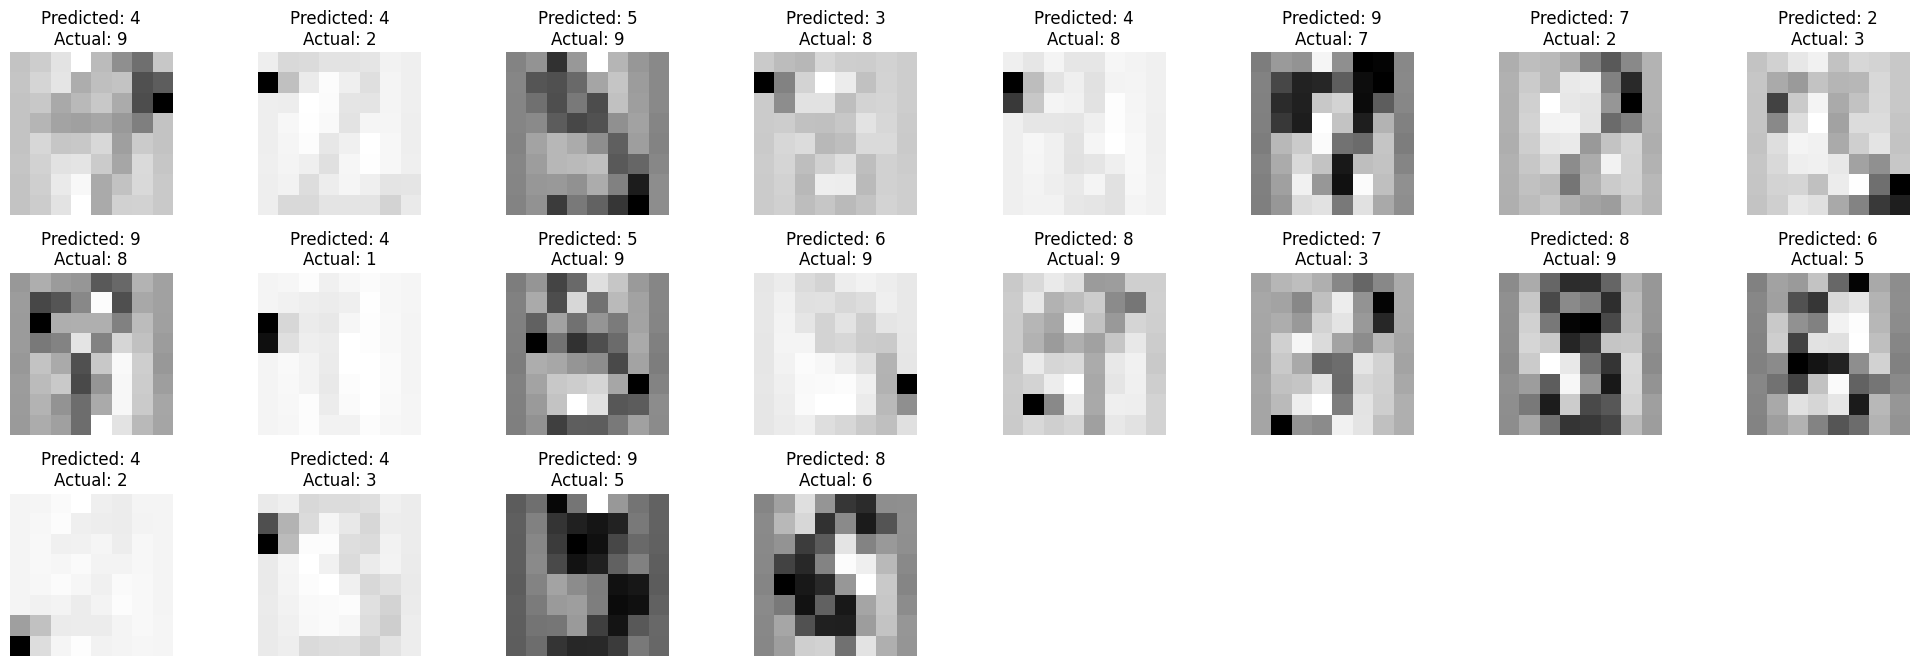

In [18]:
misclassifiedIndices = np.where(y_test != y_test_pred)[0]

plt.figure(figsize=(20, 20))
for i, index in enumerate(misclassifiedIndices):
    plt.subplot(9, 8, i+1)
    plt.axis("off")
    plt.imshow(np.reshape(x_test[index], (8,8)), cmap=plt.cm.gray_r)
    plt.title(f"Predicted: {y_test_pred[index]}\nActual: {y_test[index]}")
    
plt.tight_layout()  
plt.show()

## Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value?

In [19]:
max_score = 0
best_c = 1

# test the svm model using different c's
for c in range(1, 502, 5):

	loop = svm.SVC( kernel='rbf', C=c )
	loop.fit( x_train, y_train)

	scores = cross_val_score( estimator=loop, X=x_train, y=y_train, cv=10, scoring='accuracy' ) 
	avg_score = np.mean(scores)

	# update c if necessary
	if avg_score > max_score:
		max_score = avg_score
		best_c = c

print( 'Best c value: ', best_c)

Best c value:  6


## Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

In [21]:
x_train, x_test, y_train, y_test = train_test_split( digits.data, y, random_state=1, test_size=0.6 )
clf = svm.SVC(kernel='rbf', C=100)
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9870250231696015


## KNN

In [9]:
X_train, X_test, y_train, y_test = train_test_split( x, y, random_state=1, test_size=0.8 )
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

predicted = clf.predict(X_test)
print(confusion_matrix(y_test, predicted))

Accuracy: 0.9123783031988874
[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]


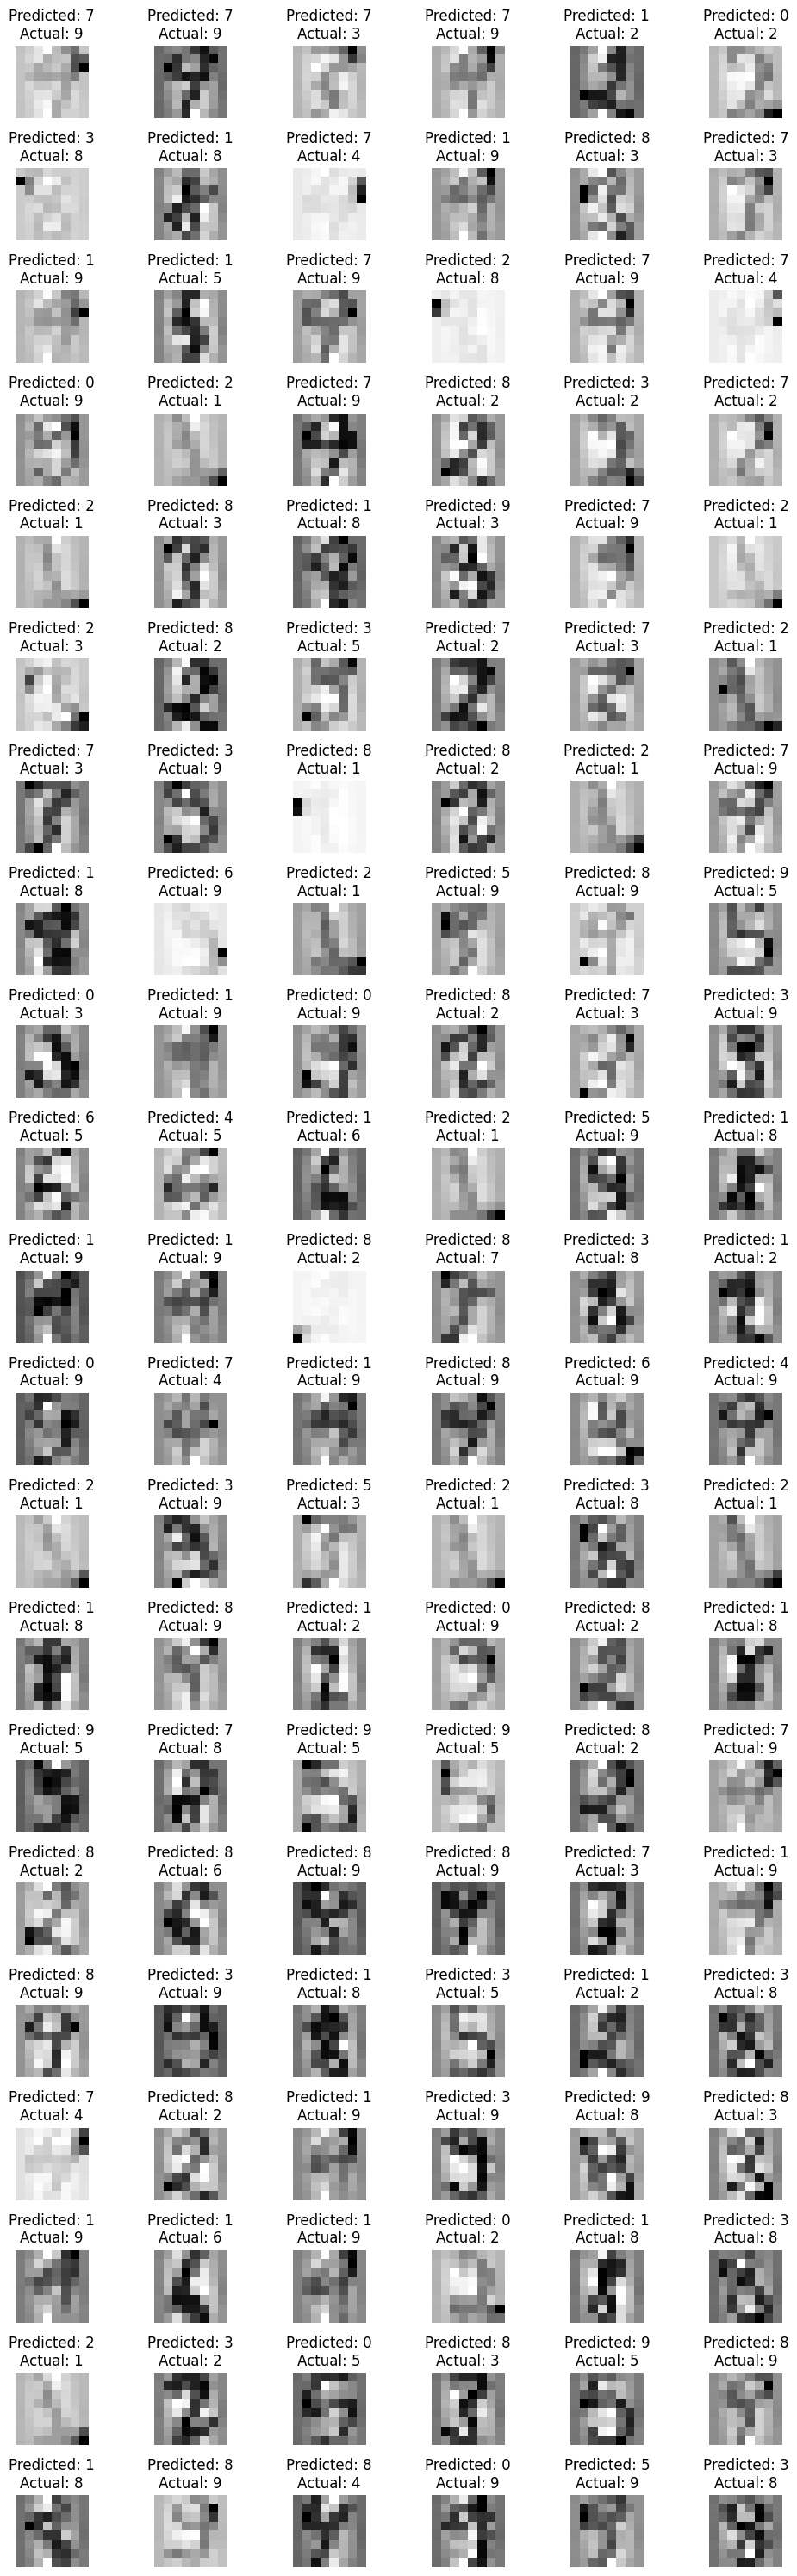

In [14]:
misclassifiedIndices = np.where(y_test != predicted)[0]

plt.figure(figsize=(10, 30))
for i, index in enumerate(misclassifiedIndices):
    plt.subplot(21, 6, i+1)
    plt.axis("off")
    plt.imshow(np.reshape(X_test[index], (8,8)), cmap=plt.cm.gray_r)
    plt.title(f"Predicted: {predicted[index]}\nActual: {y_test[index]}")
    
plt.tight_layout()  
plt.show()

In [18]:
kValues = np.arange(1, 51)
accuracyValues = []
for k in kValues:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score( clf, x, y, cv=5 )
    accuracyValues.append(np.mean(scores))

print("Best value of k:", kValues[np.argmax(accuracyValues)])


Best value of k: 3


# Part 2: Online News Dataset

## Import the data

In [3]:
# 58 are predictor variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article

df = pd.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv", skipinitialspace = True)

# Getting rid of url
df = df.drop(["url", "timedelta"], axis=1)

shares = df["shares"].values
print(shares)
X = df.drop(["shares"], axis=1).values

# define an article to be popular if it received more shares than the median number of shares
shareMedian = np.median(shares)
y = np.where(shares > shareMedian, 1, 0)


[ 593  711 1500 ... 1900 1100 1300]


## Exploratory data analysis

In [15]:
# First check to see if the values are reasonable. What are the min, median, and maximum number of shares?
print("Min: ", np.min(shares))
print("Med: ", np.median(shares))
print("Max: ", np.max(shares))


Min:  1
Med:  1400.0
Max:  843300


## Classification using KNN

In [6]:
# Develop a KNN classification model for the data. Use cross validation to choose the best value of k. 
# What is the best accuracy you can obtain on the test data?

from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=1, test_size=0.2 )
scaler = StandardScaler()
scaler.fit(X_train) 

# Apply scaling to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

kValues = np.arange(1, 100, 4)
accuracyValues = []
for k in kValues:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score( clf, X, y, cv=5 )
    accuracyValues.append(np.mean(scores))


best_k = kValues[np.argmax(accuracyValues)]
clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(X_train, y_train)

# Evaluate the model on the test data
testAccuracy = clf.score(X_test, y_test)

print("Best value of k:", kValues[np.argmax(accuracyValues)])
print("highest obtained accuracy: ", np.max(accuracyValues))
print("Test accuracy: ", testAccuracy)


Best value of k: 37
highest obtained accuracy:  0.5537289763502752
Test accuracy:  0.6347584815235212


## Classification using SVM

In [7]:
# Develop a support vector machine classification model for the data.

X_train, X_test, y_train, y_test = train_test_split( X[:5000], y[:5000], random_state=1, test_size=0.2 )
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
cValues = np.arange(1, 101, 2)
accuracyValues = []
for c in cValues:
    clf = svm.SVC(kernel='rbf', C = c)
    scores = cross_val_score( clf, X[:5000], y[:5000], cv=5 )
    accuracyValues.append(np.mean(scores))

print("Best value of c:", cValues[np.argmax(accuracyValues)])
print("highest accuracy: ", np.max(accuracyValues))


Best value of c: 3
highest accuracy:  0.558


# Classification using decision trees

In [9]:
# Develop a decision tree classification model for the data.
# Use cross validation to choose good values of the max tree depth (max_depth) and minimum samples split (min_samples_split).

XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.2)
maxDepthValues = np.arange(1, 16)
minSampleValues = np.arange(2, 20)
accuracyValues = []
for maxV in maxDepthValues:
    accuracyMaxValues = []
    for minV in minSampleValues:
        clf = tree.DecisionTreeClassifier(max_depth=maxV, min_samples_split=minV)
        scores = cross_val_score( clf, X, y, cv=5 )
        accuracyMaxValues.append(np.mean(scores))
    accuracyValues.append(accuracyMaxValues)

accScores = np.array(accuracyValues)
accIndices = np.unravel_index(np.argmax(accScores), accScores.shape)

print("best max depth: ", maxDepthValues[accIndices[0]])
print("best min split: ", minSampleValues[accIndices[1]])
print("best accuracy: ", accScores[accIndices])

best max depth:  6
best min split:  4
best accuracy:  0.6175724412892982


# Describe your findings

## Which method (k-NN, SVM, Decision Tree) worked best?
k-NN has the best performance among the three models with accuracy of 0.635 when using k=37. The Decision Tree came in second with an accuracy of 0.618 when using a max depth of 6 and a minimum split value of 4. SVM had the lowest accuracy at 0.558 when using a C value of 3.

## How did different parameters influence the accuracy?
For k-NN, the accuracy is influenced by the value of k. Accuracy increased initially as k was raised, peaking at k=37, after which it started to level off. 

For the SVM, the accuracy is influenced by the value of c. C values typically range from 1 to 10 for optimal performance. As C increased, the accuracy tended to decline, which is expected because very high C values can cause overfitting, reducing the model's generalization to new data.

In the Decision Tree model, the max depth and the minimum split value are key parameters. Accuracy peaked at a max depth of 6 and declined beyond that point, likely due to the model becoming too complex and overfitting. 

## Which model is easiest to interpret?
The Decision Tree is the easiest to interpret because of its straightforward, hierarchical structure. Each node represents a decision based on a feature, and it's easy to follow the path from root to leaf to understand how a decision is made.

## How would you interpret your results?
For k-NN, the results suggest that increasing k improves accuracy up to a point, but beyond that, it might start introducing noise and reducing performance. This shows the importance of finding an optimal k value.

For SVM, the results show that a larger C value results in a smaller margin, which can overfit the model and reduce accuracy on test data. The observed decrease in accuracy with higher C values aligns with this understanding, and further experimentation with different C values could improve the model's performance.

For the Decision Tree, the results suggest that max depth has a more consistent impact on accuracy compared to the minimum split value. The max depth value of 6 provided the best accuracy, and higher values led to overfitting. The variability observed with different minimum split values suggests a need for further testing to find an optimal setting that minimizes overfitting while maintaining model accuracy.